<a href="https://colab.research.google.com/github/premcodemaster005m-star/ML_Project_5/blob/main/Project5_Customer_Segmenent_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =============================
# STEP 1: Setup
# =============================
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# =============================
# STEP 2: Upload Dataset
# =============================
from google.colab import files
uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("Dataset Loaded:", filename)
df.head()


Saving new.csv to new (1).csv
Dataset Loaded: new (1).csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# =============================
# STEP 3: Preprocessing
# =============================

# Select only numeric columns
X = df.select_dtypes(include=[np.number])

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing done ✅")


Preprocessing done ✅


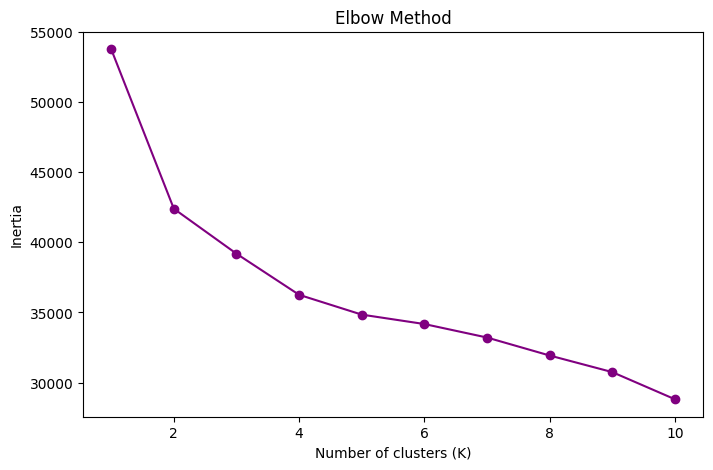

In [4]:
# =============================
# STEP 4: Elbow Method to Find Optimal K
# =============================
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', color='purple')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


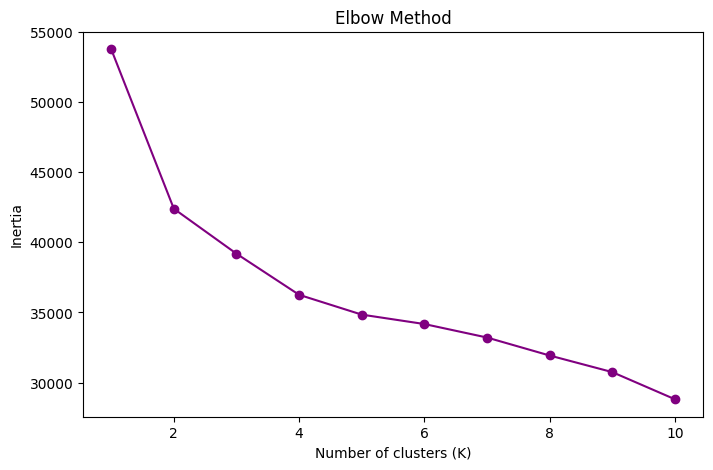

In [5]:
# =============================
# STEP 4: Elbow Method to Find Optimal K
# =============================
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', color='purple')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [6]:
# =============================
# STEP 5: K-Means Clustering
# =============================
optimal_k = 3  # Replace with K from elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0 

In [7]:
# =============================
# STEP 6: Silhouette Score
# =============================
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.2241


In [8]:
# =============================
# STEP 7: Cluster Profiling
# =============================

# Numeric features
numeric_cols = X.select_dtypes(include=np.number).columns
cluster_profile = df.groupby('Cluster')[numeric_cols].mean()
print("Cluster Profile (numeric features only):\n", cluster_profile)

# Categorical features (most frequent per cluster)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df.groupby('Cluster')[col].agg(lambda x: x.value_counts().index[0]))



Cluster Profile (numeric features only):
                   ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5602.661824  1970.496368  37275.399019  0.737692  0.528652   
1        5584.225968  1966.146067  68164.469182  0.089888  0.559301   
2        5558.875000  1968.985000  80814.863636  0.045000  0.155000   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        48.685230   80.134786   5.599677        31.797417         8.367232   
1        49.986267  512.843945  50.779026       302.398252        71.650437   
2        48.225000  853.705000  56.525000       461.750000        81.490000   

         ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster  ...                                                                
0        ...           6.503632      0.067797      0

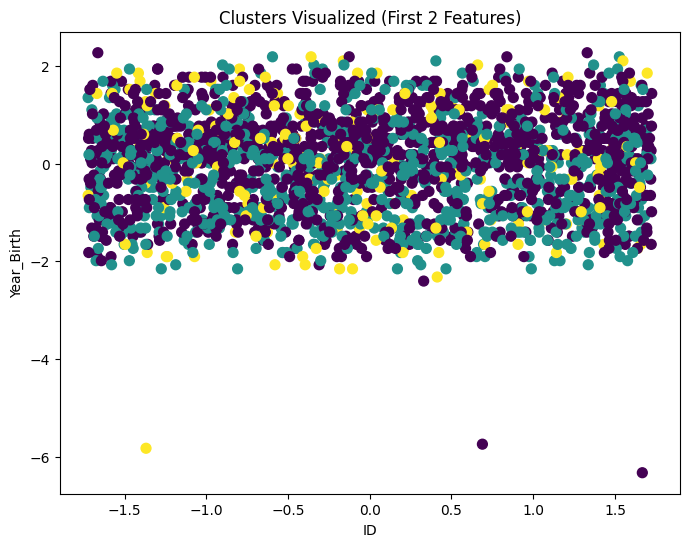

In [9]:
# =============================
# STEP 8: Cluster Visualization (2D)
# =============================
# First two numeric features
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.xlabel(df[numeric_cols[0]].name)
plt.ylabel(df[numeric_cols[1]].name)
plt.title("Clusters Visualized (First 2 Features)")
plt.show()

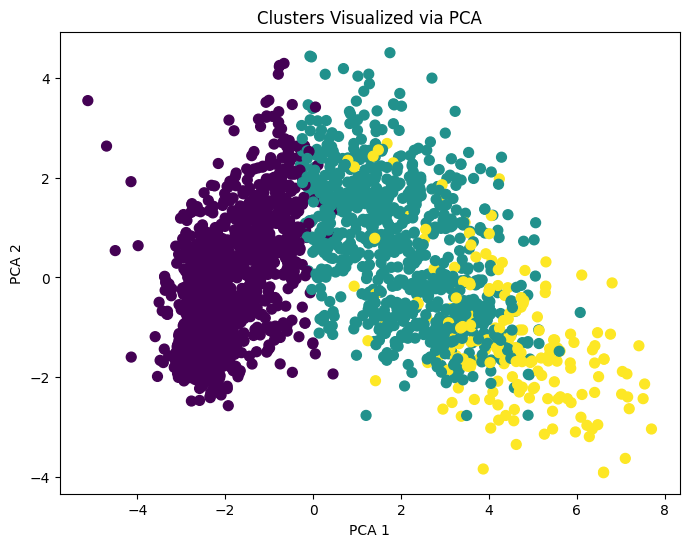

In [10]:
# =============================
# STEP 9: PCA Visualization
# =============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters Visualized via PCA")
plt.show()


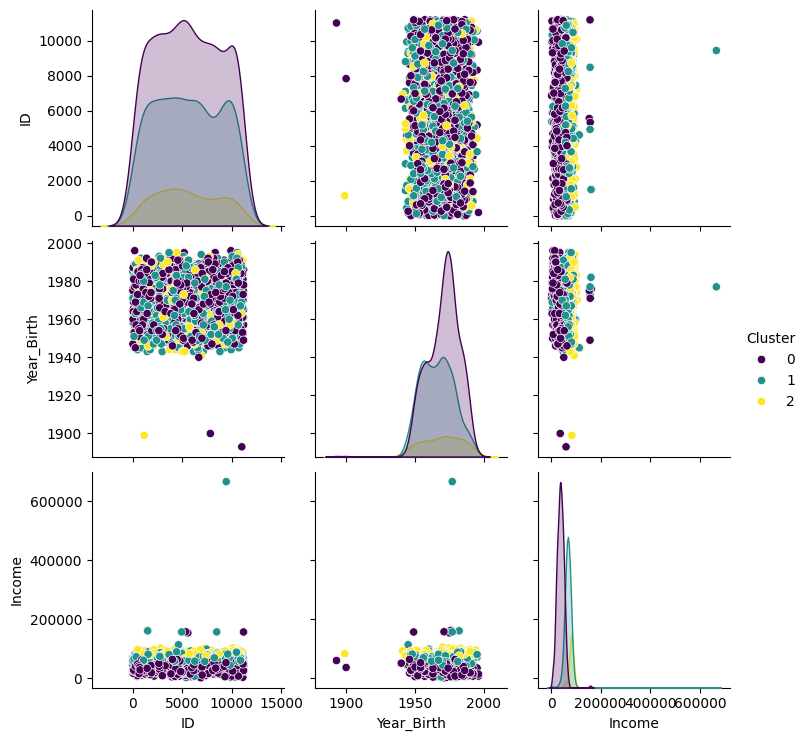

In [11]:
# =============================
# STEP 10: Pairplot of Features by Cluster
# =============================
# Select top 3 numeric features for readability
features_to_plot = numeric_cols[:3].tolist() + ['Cluster']
sb.pairplot(df[features_to_plot], hue='Cluster', palette='viridis')
plt.show()


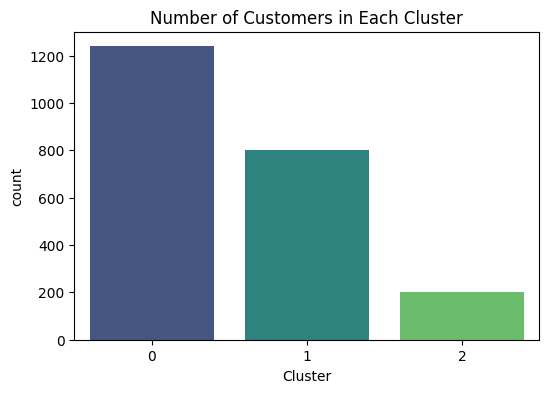

In [12]:
# =============================
# STEP 11: Cluster Counts
# =============================
plt.figure(figsize=(6,4))
sb.countplot(x='Cluster', data=df, palette='viridis')
plt.title("Number of Customers in Each Cluster")
plt.show()


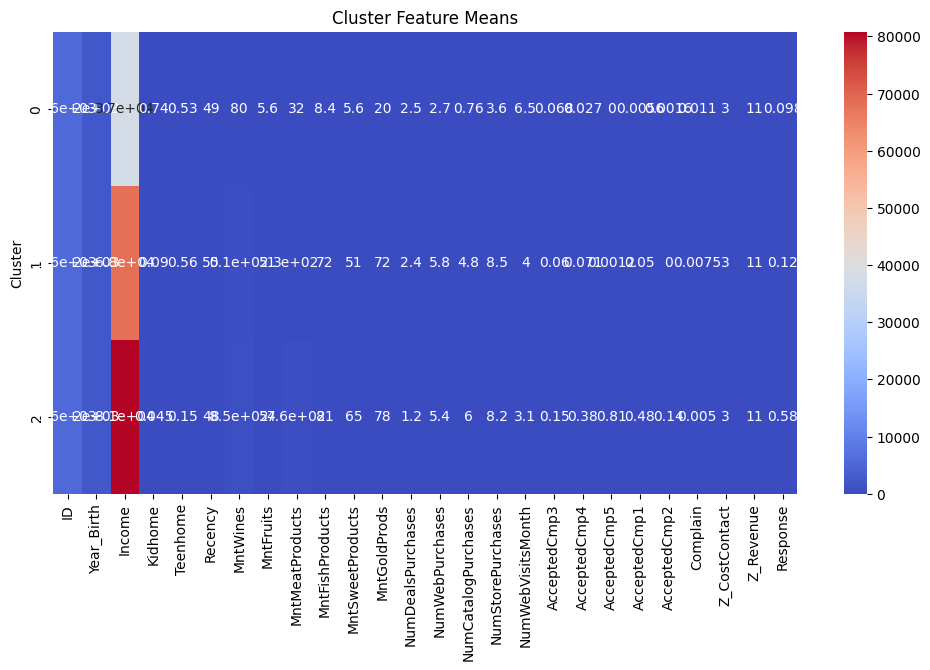

In [13]:
# =============================
# STEP 12: Heatmap of Cluster Means
# =============================
plt.figure(figsize=(12,6))
sb.heatmap(cluster_profile, annot=True, cmap='coolwarm')
plt.title("Cluster Feature Means")
plt.show()


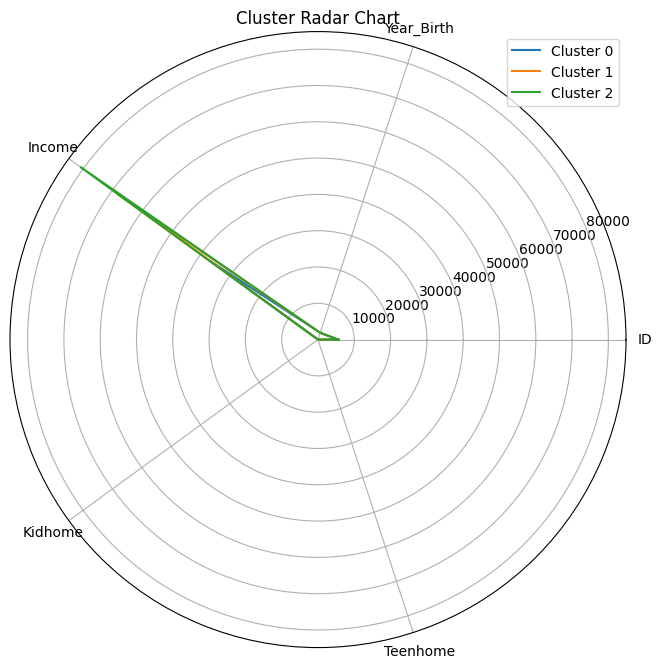

In [14]:
# =============================
# STEP 13: Radar Chart for Cluster Profiling
# =============================
features = numeric_cols[:5]  # pick first 5 features
num_clusters = cluster_profile.shape[0]
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))
for i in range(num_clusters):
    values = cluster_profile.loc[i, features].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {i}")
plt.xticks(angles[:-1], features)
plt.title("Cluster Radar Chart")
plt.legend()
plt.show()


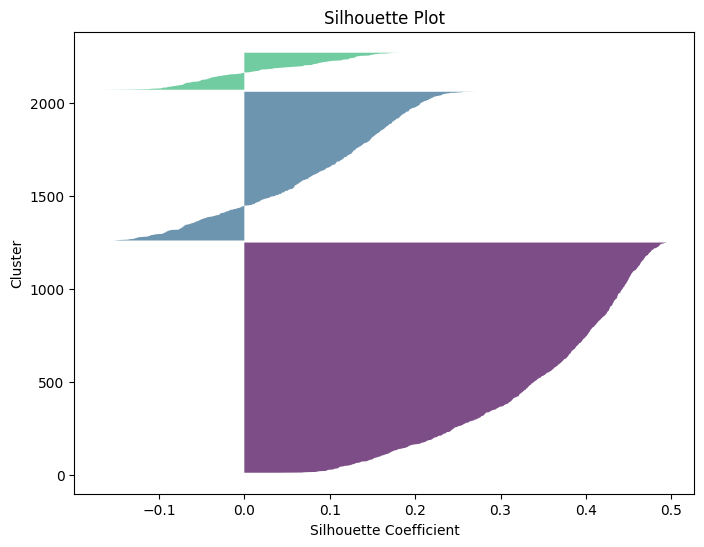

In [15]:
# =============================
# STEP 14: Silhouette Plot
# =============================
silhouette_vals = silhouette_samples(X_scaled, clusters)
y_lower = 10
plt.figure(figsize=(8,6))
for i in range(optimal_k):
    ith_cluster_silhouette = silhouette_vals[clusters == i]
    ith_cluster_silhouette.sort()
    size_cluster_i = ith_cluster_silhouette.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.viridis(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette, facecolor=color, alpha=0.7)
    y_lower = y_upper + 10
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot")
plt.show()
